# AI 1 - Assignment 2

This assignment requires you to install [Keras](https://keras.io/) and [Tensorflow](https://www.tensorflow.org). Keras is a high-level Deep Learning API, written in Python using TensorFlow, CNTK, or Theano as back-ends. Here, we will use Tensorflow as back-end.

This assignment is divided in two parts. In the first part you will learn about Keras with the help of the example below and the Keras [documentation](https://keras.io/). In the second part, you will practise training a Deep Learning model.

## How to submit
Submit this notebook with **plots**, **results** and **code** showing how the results were genereated. This assignment can either be submitted by dropping it in your student folder (on the Schulich NAS) or upload to it the CMD. Remember to name your files appropriately.
**Deadline** is on 17:30 on November 15, 2018.

## Installation
Instructions can be found here:
* [Keras](https://keras.io)
* [Tensorflow](https://www.tensorflow.org/install/)

I recommend using ```pip```. For Tensorflow is it sufficient to install the CPU version. The GPU version requires a good workstation with high-end Nvidia GPU(s), and it is not necessary for this assignment.

If you're using a virtualenv:
```
pip3 install keras
```
and 
```
pip3 install tensorflow
```
Add ```sudo``` for a systemwide installation (i.e. no ```virtualenv```).
```
sudo pip3 install keras
```
and 
```
sudo pip3 install tensorflow
```

## Part 1 - understand a model

### Optimizers

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater than zero. The goal of training a model is to find a set of weights and biases (i.e. parameters) that have, on average, a low loss across all examples. The term cost is used interchangably with loss. See the [loss section](https://keras.io/losses/) in the Keras documentation for a list and descriptions of what is available.

<img src="./LossSideBySide.png" width="500">
<figcaption>Figure. Left: high loss and right: low loss.</figcaption>

The optimizer is the algorithm used to minimize the loss/cost. Optimizers in neural networks work by finding the gradient/derivative of the loss with respect to the parameters (i.e. the weights). "Gradient" is the correct term since a we are looking at multi-dimensional systems (i.e. many parameters), however, the terms are often used interchangably. For those who didn't take multivariable calculus, just think of the gradient as a derivative. The derivative of the loss with respect to a parameters tells us how much the loss changes when we nudge a weight up or down. So, by knowing how a given parameter affects the loss the optimizer can change it so as to decrease the loss. The various optimizers differ in how they change the weights. 

#### Mini-overview over popular optimizers

* **Stochastic Gradient Descent (SGD)**. This is the most basic and easy to understand optimizer. It updates the weights in the negative direction of the gradient by taking the average gradient of mini-batch of data (e.g. 20-50 exemplars) in each step. Vanilla SGD only has one hyper-parameter, the learning rate.
* **Momentum**. This optimizer "gains speed" when the gradient has pointed in the same direction for several consecutive updates. That is, it gains momentum. It does this by accumulating an exponentially decaying moving average of past gradients. The step size depends on how large and aligned the sequence of gradients are. The most important hyper-parameter is alpha and common values are 0.5 and 0.9.
* **Nesterov Momentum**. This is a modification of the standard momentum optimizer.
* **AdaGrad**. This optimizer Ada-ptively sets the learning rate depending on the steepness/magnitude of the Grad-ients. This is done so that weights with big gradients get a smaller effective learning rate, and weights with small gradients will get a greater effective learning rate. The result is quicker progress in the more gently sloped directions of the weight space and a slowdown in stepp regions.
* **RMSProp**. This is modification of AdaGrad, where the accumulated gradient decays, that is, the influence of previous gradients gradually decreases.
* **Adam**. The name comes from "adaptive moments", and it is a combination of RMSProp and momentum. It has several hyper-parameters.

The above list just gives a quick overview of some of the most common. However, old optimizers are constantly improved and new are developed. SGD and momentum are most basic and easiest to understand and implement. They are still in use, but the more advanced optimizers tend to be better for practical use. Which one to use is generally an emperical question depending on both the data and the model.

For a more complete overview of optimization algorithms see [this comparison](http://ruder.io/optimizing-gradient-descent/), and to see what is available in Keras, see the [optimizer section](https://keras.io/optimizers/) of the documentation.

See the images below for a comparison of optimizers in a 2D space (NAG: Nesterov accelerated gradient, Adadelta: an extension of AdaGrad).

<img src="./contours_evaluation_optimizers.gif" width="500">
<img src="./saddle_point_evaluation_optimizers.gif" width="500">

In [6]:
# imports
import numpy as np
#from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.set_random_seed(2)
import numpy as np

tmp = np.load('mnist.npz')

X = tmp['X']

y = tmp['y']
# Load data from https://www.openml.org/d/554
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = X[:1000], y[:1000]
X = X.reshape(X.shape[0], 28, 28, 1)
# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

### Question 1
**The data set**

Plot a three examples from the data set.
* What type of data are in the data set?
* What does the line ```X = X.reshape(X.shape[0], 28, 28, 1)``` do?

Look at how the encoding of the targets (i.e. ```y```) is changed. E.g. the lines
```
y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1
```
Print out a few rows of ```y``` next to ```y_oh```.
* What is the relationship between ```y``` and ```y_oh```?
* What is the type of encoding in ```y_oh``` called and why is it used?
* Plot three data examples in the same figure and set the correct label as title. 
    * It should be possible to see what the data represent.

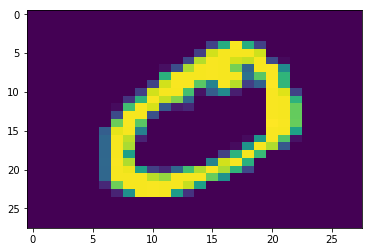

In [7]:
plt.imshow(X[1, :, :].reshape((28,-1)), aspect='auto')

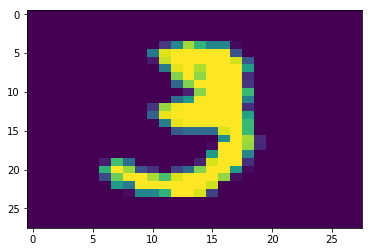

In [8]:
plt.imshow(X[10, :, :].reshape((28,-1)), aspect='auto')

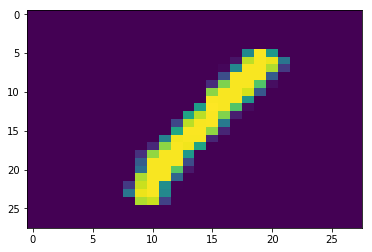

In [9]:
plt.imshow(X[23, :, :].reshape((28,-1)), aspect='auto')

The data is an array that shows the value of the colour. The data can then be printed as an image that outputs the colours, as shown by the array in the shape. 

The reshape function allows the array to be shaped in the correct size format. This allows matplotlib to put the image in the desired figure. 

In [10]:
print(y[1])
print(y_oh[1])

print(y[3])
print(y_oh[3])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


The y value is the value that the drawing is providing. The y value is the correct value for the picture and is used to train the neural network to learn the drawing. The value for y_oh is the encoder value for y. In the case of X_train[1] the value is 0 in y and therefore the y_oh value is in the [0] space of the y_oh matrix. The value in the encoder allows the value to be determined through the neural network and used to show which number the drawing corresponds to. In the event of a neural network the input is sent in and will move towards the y_oh value, which then is attributed to a number. 

### Question 2
**The model**

Below is some code for bulding and training a model with Keras.
* What type of network is implemented below? I.e. a normal MLP, RNN, CNN, Logistic Regression...?
* What does ```Dropout()``` do?
* Which type of activation function is used for the hidden layers?
* Which type of activation function is used for the output layer?
* Why are two different activation functions used?
* What optimizer is used in the model below?
* How often are the weights updated (i.e. after how many data examples)?
* What loss function is used?
* How many parameters (i.e. weights and biases, NOT hyper-parameters) does the model have?

1. The network implemented below is a CNN
2. The Dropout() function that "consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting." https://keras.io/layers/core/#dropout
3. The ReLu function is used on the hidden layers
4. A softmax activation function is used on the output layer
5. There are two different activation functions, because the first activation function is used to train the model in the hidden layers while the softmax is used to affect the output. 
6. The optimizer used is that of stochastic gradient descent
7. It changes it every time as shown by the batchsize of 32
8. Categorical crossentrpy is used as a loss function. 
9. Using model.summary() shows 108 618 parameters

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
model.fit(X_train, y_oh_train, batch_size=32, epochs=60)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print(test_loss)
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])


Epoch 1/60
800/800 [==============================] - 0s 567us/step - loss: 2.2090
Epoch 2/60
800/800 [==============================] - 0s 310us/step - loss: 1.1778
Epoch 3/60
800/800 [==============================] - 0s 300us/step - loss: 0.5237
Epoch 4/60
800/800 [==============================] - 0s 310us/step - loss: 0.3213
Epoch 5/60
800/800 [==============================] - 0s 317us/step - loss: 0.2384
Epoch 6/60
800/800 [==============================] - 0s 308us/step - loss: 0.1926
Epoch 7/60
800/800 [==============================] - 0s 313us/step - loss: 0.1528
Epoch 8/60
800/800 [==============================] - 0s 302us/step - loss: 0.1241
Epoch 9/60
800/800 [==============================] - 0s 304us/step - loss: 0.0914
Epoch 10/60
800/800 [==============================] - 0s 324us/step - loss: 0.0768
Epoch 11/60
800/800 [==============================] - 0s 304us/step - loss: 0.0526
Epoch 12/60
800/800 [==============================] - 0s 299us/step - loss: 0.0486
E

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

## Part 2 - train a model

A model's performance depends on many factors apart from the model architecture (e.g. type and number of layers) and the dataset. Here you will get to explore some of the factors that affect model performance. Much of the skill in training deep learning models lies in quickly finding good values/options for these choises.

In order to observe the learning process it is best to compare the training set loss with the loss on the test set. How to visualize these variables in Keras is described under [Training history visualization](https://keras.io/visualization/#training-history-visualization) in the documentation.

You will explore the effect of 1) optimizer, 2) training duration, and 3) dropout (see the question above).

When training, an **epoch** is one pass through the full training set.

### Question 3

* **Vizualize the training**. Use the model above to observe the training process. Train it for 150 epochs and then plot both "loss" and "val_loss" (i.e. loss on the valiadtion set, here the terms "validation set" and "test set" are used interchangably, but this is not always true). What is the optimal number of epochs for minimizing the test set loss? 
    * Remember to first reset the weights (```model.reset_states()```), otherwise the training just continues from where it was stopped earlier.

* **Optimizer**. Select three different optimizers and for each find the close-to-optimal hyper-parameter(s). In your answer, include a) your three choises, b) best hyper-parameters for each of the three optimizers and, c) the code that produced the results.
    * *NOTE* that how long the training takes varies with optimizer. I.e., make sure that the model is trained for long enough to reach optimal performance.

* **Dropout**. Use the best optimizer and do hyper-parameter seach and find the best value for ```Dropout()```.

* **Best model**. Combine the what you learned from the above three questions to build the best model. How much better is it than the worst and average models?

* **Results on the test set**. When doing this search for good model configuration/hyper-parameter values, the data set was split into *two* parts: a training set and a test set (the term "validation" was used interchangably wiht "test"). For your final model, is the performance (i.e. accuracy) on the test set representative for the performance one would expect on a previously unseen data set (drawn from the same distribution)? Why?


**Good luck!**

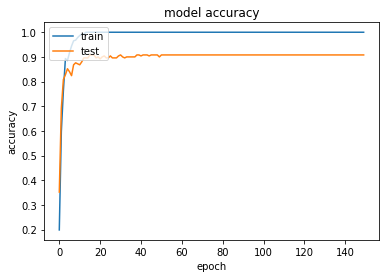

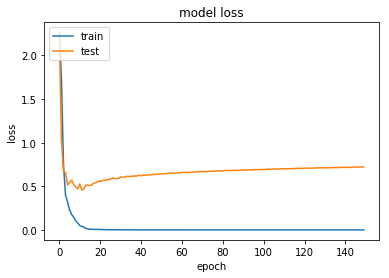

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, RMSprop


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model
history = model.fit(X, y_oh, validation_split=0.25, batch_size=32, epochs=150, verbose=0)

# Evaluate performance
#test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

#predictions = model.predict(X_test, batch_size=32)
#predictions = np.argmax(predictions, axis=1) # change encoding again
#print(history.history.keys())
#print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.reset_states()

The optimal number of epochs is 18. We can see this, because the loss function begins to flatten. 

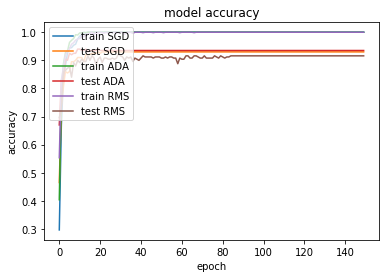

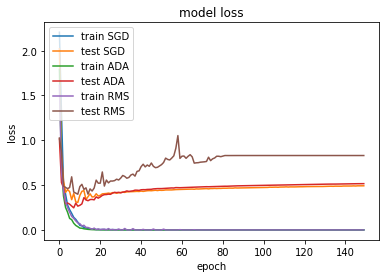

In [25]:
model.reset_states()


for i in range(3):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.))

    model.add(Dense(10, activation='softmax'))
    if i == 0:
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

        # Compile the model
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_oh_train, validation_data=[X_test, y_oh_test], batch_size=32, epochs=150, verbose=0)
    elif i == 1:
        # Evaluate performance
        ada = Adadelta()

        # Compile the model
        model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])

        # Train the model
        history2 = model.fit(X_train, y_oh_train, validation_data=[X_test, y_oh_test], batch_size=32, epochs=150, verbose=0)
    elif i == 2:
        rms = RMSprop()

        # Compile the model
        model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

        # Train the model
        history3 = model.fit(X, y_oh, validation_split=0.25, batch_size=32, epochs=150, verbose=0)

    model.reset_states()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train SGD', 'test SGD', 'train ADA', 'test ADA', 'train RMS', 'test RMS'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train SGD', 'test SGD', 'train ADA', 'test ADA', 'train RMS', 'test RMS'], loc='upper left')
plt.show()


# Optimize the training set based on these parameters

In [17]:
model.reset_states()  

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

opt = ["sgd", "ada", "rms"]

lr_range = [0.1, 0.01, 0.001, 0.0001, 0.00001]

decay = [1e-6, 1e-5, 1e-4]

momentum = [0, 0.5, 0.9]

rho = [0, 0.8, 0.95]

d = {"optimizer": opt, "learning_rate": lr_range, "Decay": decay, "Momentum": momentum, "Rho": rho}
print(d)

{'optimizer': ['sgd', 'ada', 'rms'], 'learning_rate': [0.1, 0.01, 0.001, 0.0001, 1e-05], 'Decay': [1e-06, 1e-05, 0.0001], 'Momentum': [0, 0.5, 0.9], 'Rho': [0, 0.8, 0.95]}


# Optimizing Learning Rate

We look at three different optimizers and their hyperparameters. In this case we use SGD, Adadelta and RMSprop. Per the keras documentation we can freely choose hyperparameters for learning rate and decay for both SGD and AdaDelta. RMSprop suggests leaving all parameters the same, but allows for learning rate to be changed. Keras also states that RMSprop  is better for RNN, but we want to prove this, so we will use it in this case as well. We will therefore only look at the learning rate (for time purposes, as the model takes a long time to run. 

We can then look at the training loss and test loss to determine the best model at the best learning rate.

We will only be looking at learning rate in this scenario, because we want to see how learning rate affects the model. At the end of this report I have included the code that would allow you to run one for each parameter. This model will take time to run and uses a large amount of computing power and is therefore inefficient. I have included this in the APPENDIX for all three. 

While we can change the epochs (or optimize them) to get a better result we will stick with 150 once again for time purposes, as teh program takes a long time to complete its learning at only 150 epochs. 

In [18]:
sgd_list = []
ada_list = []
rms_list = []
for o in range(len(d['optimizer'])): 
    for i in range(len(d['learning_rate'])):
        model = Sequential()

        model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        # Max pooling
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.))

        model.add(Conv2D(32, (3, 3), activation='relu'))
        # Max pooling
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())

        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.))

        model.add(Dense(10, activation='softmax'))
        if d['optimizer'][o] == "sgd":
            sgd = SGD(lr=d['learning_rate'][i], decay=d['Decay'][0], momentum=d['Momentum'][2], nesterov=True)

            model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
            history = model.fit(X, y_oh, validation_split=0.25, batch_size=32, epochs=150, verbose=0)
            sgd_list.append(history)
        elif d['optimizer'][o] == "ada":
            ada = Adadelta(lr=d['learning_rate'][i])

            model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
            history = model.fit(X, y_oh, validation_split=0.25, batch_size=32, epochs=150, verbose=0)
            ada_list.append(history)
        elif d['optimizer'][o] == "rms":
            rms = RMSprop(lr=d['learning_rate'][i])

            model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])
            history = model.fit(X, y_oh, validation_split=0.25, batch_size=32, epochs=150, verbose=0)
            rms_list.append(history)
        model.reset_states()       
print(len(sgd_list))
print(len(ada_list))
print(len(rms_list))    


5
5
5


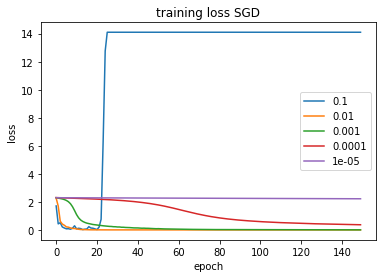

In [19]:
for i in range(len(sgd_list)):
    plt.plot(sgd_list[i].history["loss"])
plt.title('training loss SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(d['learning_rate'], loc='best')
plt.show()

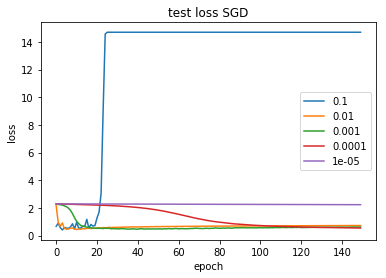

In [26]:
for i in range(len(sgd_list)):
    plt.plot(sgd_list[i].history["val_loss"])
plt.title('test loss SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(d['learning_rate'], loc='best')
plt.show()

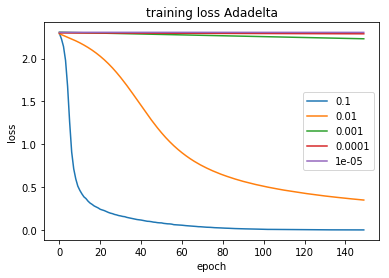

In [21]:
for i in range(len(ada_list)):
    plt.plot(ada_list[i].history["loss"])
plt.title('training loss Adadelta')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(d['learning_rate'], loc='best')
plt.show()


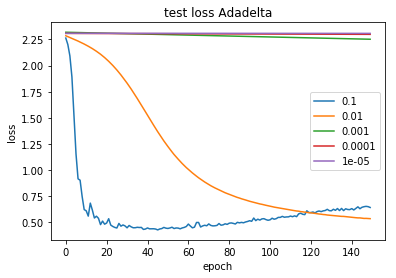

In [22]:
for i in range(len(ada_list)):
    plt.plot(ada_list[i].history["val_loss"])
plt.title('test loss Adadelta')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(d['learning_rate'], loc='best')
plt.show()

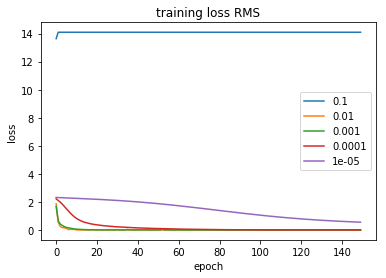

In [23]:
for i in range(len(rms_list)):
    plt.plot(rms_list[i].history["loss"])
plt.title('training loss RMS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(d['learning_rate'], loc='best')
plt.show()

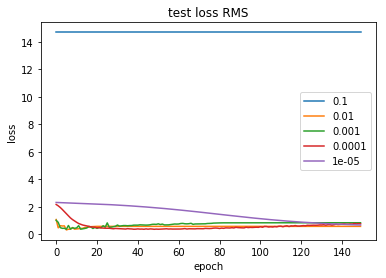

In [24]:
for i in range(len(rms_list)):
    plt.plot(rms_list[i].history["val_loss"])
plt.title('test loss RMS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(d['learning_rate'], loc='best')
plt.show()

We notice here that the best option is Adadelta with a learning rate of 0.01. The loss function and val_loss function both follow the ideal shape, while not begining to overfit. Other examples look promising, based on the loss function such as Adadelta 0.1, but the val_loss function shows a different story. This implies overfitting is likely occuring, as it sees examples it hasn't seen before and becomes confused. 

The test loss function at 0.1 does not do a good job, because of this overfitting and it increases; however, the dropout rate is 0 for this example. As dropout is a method used to reduce overfitting we will use the learning rate of 0.1 to see if adding a dropout rate is effective. If adding dropout reduces the effects of overfitting we will use the learning rate of 0.1, if it does not effective reduce the amount of overfitting we will use the learning rate of 0.01. 

# Optimizing dropout

"Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting." 

https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/ 

As mentioned above we will use the Adadelta with the default parameters and a learning rate of 0.1. 

In order to optimize dropout we will try it against several different values. 0.0, 0.2, 0.4 and 0.6

In [48]:
drop = [0, 0.2, 0.4, 0.6]
dropout = {"dropout": drop}
ada_dropout_list = []
print(dropout)
for i in range(len(dropout['dropout'])):
    model.reset_states()
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout['dropout'][i]))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout['dropout'][i]))

    model.add(Dense(10, activation='softmax'))
    
    ada = Adadelta(lr=0.1)

    model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
    history = model.fit(X, y_oh, validation_split=0.25, batch_size=32, epochs=150, verbose=0)
    ada_dropout_list.append(history)


print(len(dropout['dropout']))
print(len(ada_dropout_list))

{'dropout': [0, 0.2, 0.4, 0.6]}
4
4


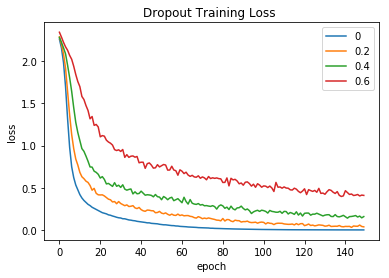

In [49]:
for i in range(len(ada_dropout_list)):
    plt.plot(ada_dropout_list[i].history["loss"])
plt.title('Dropout Training Loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(dropout['dropout'], loc='best')
plt.show()   

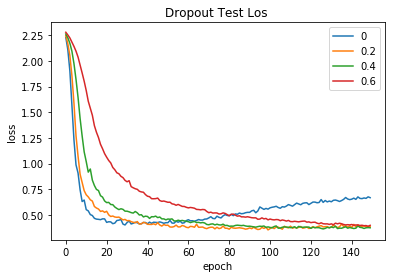

In [50]:
for i in range(len(ada_dropout_list)):
    plt.plot(ada_dropout_list[i].history["val_loss"])
plt.title('Dropout Test Los ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(dropout['dropout'], loc='best')
plt.show()   

The dropout rate has a positive effect on the val_loss function removing the aforementioned overfitting problem. The best value is 0.2 and so we can write the finalized code as the following.

# Final Code

As previously mentioned the resulting loss function for Adadelta with a learning rate of 0.1, 150 epochs and a dropout of 0.2 provides the best results for this data. 

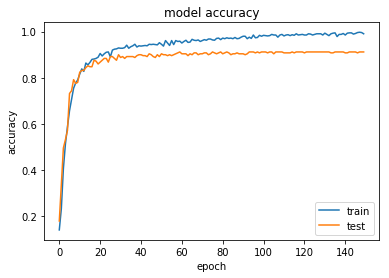

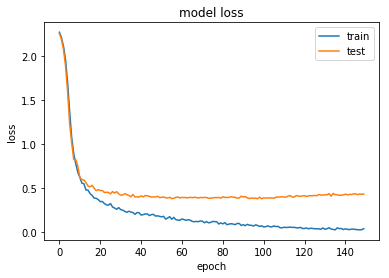

In [56]:
model.reset_states()
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
    
ada = Adadelta(lr=0.1)

model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
history = model.fit(X, y_oh, validation_split=0.25, batch_size=32, epochs=150, verbose=0)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


The final accuracy of the test set is 0.89. This value is good for the test set, as it consists of images that the data has not seen before. We do not want the data to be 100%, because this would show overfitting of the model and it is just  

In another scenario we could optimize all the parameters at once and look to find the one that has the lowest loss function. 

We could also optimize the hyperparameters by comparing all the different ones to each other. I have included a code that would do so in the Appendix.

We could also look at varying dropout rates for each different iteration of the optimizers. 

Another method would be to look at each variable against the constants and move forward with the best one and keep iterating over it until the model was happy with the best model. 

# Appendix

In this appendix I have included the code to optimize the following three parameters: 
- learning rate
- decay
- momentum

This works for all three optimizers. 

Once this is complete it would be beneficial to test the best two or three models with a different dropout rate. 

Note that this code takes time to run and will require a lot of computing power. 

In [41]:
sgd_list2 = []
ada_list2 = []
rms_list2 = []

model.reset_states() 
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))
model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

for o in range(len(d['optimizer'])):
    for i in range(len(d['learning_rate'])):
        if d['optimizer'][o] == "rms":
            rms = RMSprop(lr=d['learning_rate'][i])

            model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])
            history = model.fit(X, y_oh, validation_split=0.25, batch_size=32, epochs=150, verbose=0)
            rms_list2.append(history)
            
        else:
            for j in range(len(d['Decay'])):
                if d['optimizer'][o] == "sgd":
                    sgd = SGD(lr=d['learning_rate'][i], decay=d['Decay'][j], nesterov=True)

                    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
                    history = model.fit(X, y_oh, validation_split=0.25, batch_size=32, epochs=150, verbose=0)
                    sgd_list2.append(history)
                elif d['optimizer'][o] == "ada":
                    ada = Adadelta(lr=d['learning_rate'][i], decay=d['Decay'][j])

                    model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
                    history = model.fit(X, y_oh, validation_split=0.25, batch_size=32, epochs=150, verbose=0)
                    ada_list2.append(history)
                model.reset_states() 
                model = Sequential()

                model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
                # Max pooling
                model.add(MaxPooling2D(pool_size=(2, 2)))
                model.add(Dropout(0.))

                model.add(Conv2D(32, (3, 3), activation='relu'))
                # Max pooling
                model.add(MaxPooling2D(pool_size=(2, 2)))
                model.add(Flatten())
                model.add(Dense(128, activation='relu'))
                model.add(Dropout(0.))

                model.add(Dense(10, activation='softmax'))
        
        
        model.reset_states() 
        model = Sequential()

        model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        # Max pooling
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.))

        model.add(Conv2D(32, (3, 3), activation='relu'))
        # Max pooling
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.))

        model.add(Dense(10, activation='softmax'))
print(len(sgd_list2))
print(len(ada_list2))
print(len(rms_list2))    



5
5
5


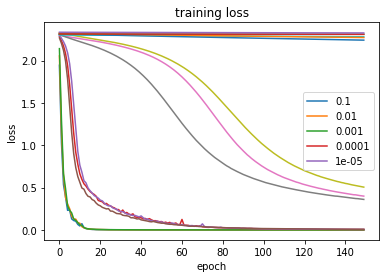

In [42]:
for i in range(len(sgd_list2)):
    plt.plot(sgd_list2[i].history["loss"])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(d['learning_rate'], loc='best')
plt.show()

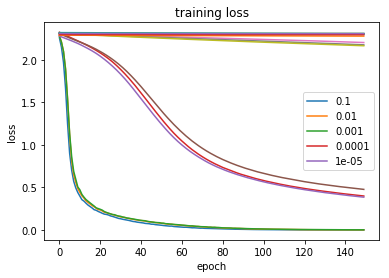

In [43]:
for i in range(len(ada_list2)):
    plt.plot(ada_list2[i].history["loss"])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(d['learning_rate'], loc='best')
plt.show()

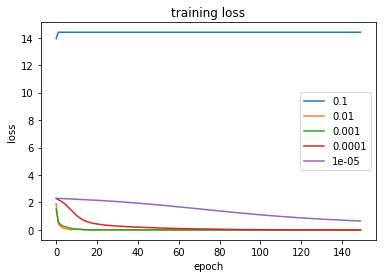

In [44]:
for i in range(len(rms_list2)):
    plt.plot(rms_list2[i].history["loss"])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(d['learning_rate'], loc='best')
plt.show()